In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
import requests
from bs4 import BeautifulSoup
import json
import random
from highlight_text import htext
import seaborn as sns
from pprint import pprint
import matplotlib.image as mpimg
import matplotlib.patches as patches
from PIL import Image
from io import BytesIO
from highlight_text import htext
import matplotlib as mpl
from matplotlib.gridspec import GridSpec

In [2]:

def draw_pitch(x_min=0, x_max=105,
               y_min=0, y_max=68,
               pitch_color="w",
               line_color="grey",
               line_thickness=1.5,
               point_size=20,
               orientation="horizontal",
               aspect="full",
               ax=None
               ):

    if not ax:
        raise TypeError("This function is intended to be used with an existing fig and ax in order to allow flexibility in plotting of various sizes and in subplots.")


    if orientation.lower().startswith("h"):
        first = 0
        second = 1
        arc_angle = 0

        if aspect == "half":
            ax.set_xlim(x_max / 2, x_max + 5)

    elif orientation.lower().startswith("v"):
        first = 1
        second = 0
        arc_angle = 90

        if aspect == "half":
            ax.set_ylim(x_max / 2, x_max + 5)

    
    else:
        raise NameError("You must choose one of horizontal or vertical")

    
    ax.axis("off")

    rect = plt.Rectangle((x_min, y_min),
                         x_max, y_max,
                         facecolor=pitch_color,
                         edgecolor="none",
                         zorder=-2)

    ax.add_artist(rect)

    x_conversion = x_max / 100
    y_conversion = y_max / 100

    pitch_x = [0,5.8,11.5,17,50,83,88.5,94.2,100] # pitch x markings
    pitch_x = [x * x_conversion for x in pitch_x]

    pitch_y = [0, 21.1, 36.6, 50, 63.2, 78.9, 100] # pitch y markings
    pitch_y = [x * y_conversion for x in pitch_y]

    goal_y = [45.2, 54.8] # goal posts
    goal_y = [x * y_conversion for x in goal_y]

    # side and goal lines
    lx1 = [x_min, x_max, x_max, x_min, x_min]
    ly1 = [y_min, y_min, y_max, y_max, y_min]

    # outer boxed
    lx2 = [x_max, pitch_x[5], pitch_x[5], x_max]
    ly2 = [pitch_y[1], pitch_y[1], pitch_y[5], pitch_y[5]]

    lx3 = [0, pitch_x[3], pitch_x[3], 0]
    ly3 = [pitch_y[1], pitch_y[1], pitch_y[5], pitch_y[5]]

    # goals
    lx4 = [x_max, x_max+2, x_max+2, x_max]
    ly4 = [goal_y[0], goal_y[0], goal_y[1], goal_y[1]]

    lx5 = [0, -2, -2, 0]
    ly5 = [goal_y[0], goal_y[0], goal_y[1], goal_y[1]]

    # 6 yard boxes
    lx6 = [x_max, pitch_x[7], pitch_x[7], x_max]
    ly6 = [pitch_y[2],pitch_y[2], pitch_y[4], pitch_y[4]]

    lx7 = [0, pitch_x[1], pitch_x[1], 0]
    ly7 = [pitch_y[2],pitch_y[2], pitch_y[4], pitch_y[4]]


    # Halfway line, penalty spots, and kickoff spot
    lx8 = [pitch_x[4], pitch_x[4]]
    ly8 = [0, y_max]

    lines = [
        [lx1, ly1],
        [lx2, ly2],
        [lx3, ly3],
        [lx4, ly4],
        [lx5, ly5],
        [lx6, ly6],
        [lx7, ly7],
        [lx8, ly8],
        ]

    points = [
        [pitch_x[6], pitch_y[3]],
        [pitch_x[2], pitch_y[3]],
        [pitch_x[4], pitch_y[3]]
        ]

    circle_points = [pitch_x[4], pitch_y[3]]
    arc_points1 = [pitch_x[6], pitch_y[3]]
    arc_points2 = [pitch_x[2], pitch_y[3]]


    for line in lines:
        ax.plot(line[first], line[second],
                color=line_color,
                lw=line_thickness,
                zorder=-1)

    for point in points:
        ax.scatter(point[first], point[second],
                   color=line_color,
                   s=point_size,
                   zorder=-1)

    circle = plt.Circle((circle_points[first], circle_points[second]),
                        x_max * 0.088,
                        lw=line_thickness,
                        color=line_color,
                        fill=False,
                        zorder=-1)

    ax.add_artist(circle)

    arc1 = Arc((arc_points1[first], arc_points1[second]),
               height=x_max * 0.088 * 2,
               width=x_max * 0.088 * 2,
               angle=arc_angle,
               theta1=128.75,
               theta2=231.25,
               color=line_color,
               lw=line_thickness,
               zorder=-1)

    ax.add_artist(arc1)

    arc2 = Arc((arc_points2[first], arc_points2[second]),
               height=x_max * 0.088 * 2,
               width=x_max * 0.088 * 2,
               angle=arc_angle,
               theta1=308.75,
               theta2=51.25,
               color=line_color,
               lw=line_thickness,
               zorder=-1)

    ax.add_artist(arc2)

    ax.set_aspect("equal")

    return ax

In [3]:
#Display entire dataframe
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [5]:
#scrape a single game shots. We will allow users to enter a base url
base_url = 'https://understat.com/match/'
match = str(input('Please enter the match id: '))
url = base_url+match
url

Please enter the match id: 14951


'https://understat.com/match/14951'

In [6]:
#Use requests to get the webpage and BeautifulSoup to parse the page
res = requests.get(url)
soup = BeautifulSoup(res.content, 'lxml')
scripts = soup.find_all('script')

In [7]:
#get only the shotsData
strings = scripts[1].string

In [8]:
strings

"\n\tvar shotsData \t= JSON.parse('\\x7B\\x22h\\x22\\x3A\\x5B\\x7B\\x22id\\x22\\x3A\\x22397932\\x22,\\x22minute\\x22\\x3A\\x221\\x22,\\x22result\\x22\\x3A\\x22SavedShot\\x22,\\x22X\\x22\\x3A\\x220.8080000305175781\\x22,\\x22Y\\x22\\x3A\\x220.29200000762939454\\x22,\\x22xG\\x22\\x3A\\x220.02579367160797119\\x22,\\x22player\\x22\\x3A\\x22Antonio\\x20Puertas\\x22,\\x22h_a\\x22\\x3A\\x22h\\x22,\\x22player_id\\x22\\x3A\\x227863\\x22,\\x22situation\\x22\\x3A\\x22OpenPlay\\x22,\\x22season\\x22\\x3A\\x222020\\x22,\\x22shotType\\x22\\x3A\\x22RightFoot\\x22,\\x22match_id\\x22\\x3A\\x2214951\\x22,\\x22h_team\\x22\\x3A\\x22Granada\\x22,\\x22a_team\\x22\\x3A\\x22Barcelona\\x22,\\x22h_goals\\x22\\x3A\\x220\\x22,\\x22a_goals\\x22\\x3A\\x224\\x22,\\x22date\\x22\\x3A\\x222021\\x2D01\\x2D09\\x2017\\x3A30\\x3A00\\x22,\\x22player_assisted\\x22\\x3A\\x22Roberto\\x20Soldado\\x22,\\x22lastAction\\x22\\x3A\\x22BallRecovery\\x22\\x7D,\\x7B\\x22id\\x22\\x3A\\x22397936\\x22,\\x22minute\\x22\\x3A\\x2216\\x22,\\x2

In [9]:
# strip unnecessary symbols and get only JSON data 
ind_start = strings.index("('")+2 
ind_end = strings.index("')") 
json_data = strings[ind_start:ind_end] 
json_data = json_data.encode('utf8').decode('unicode_escape')

#convert string to json format
data = json.loads(json_data)

In [10]:
data

{'h': [{'id': '397932',
   'minute': '1',
   'result': 'SavedShot',
   'X': '0.8080000305175781',
   'Y': '0.29200000762939454',
   'xG': '0.02579367160797119',
   'player': 'Antonio Puertas',
   'h_a': 'h',
   'player_id': '7863',
   'situation': 'OpenPlay',
   'season': '2020',
   'shotType': 'RightFoot',
   'match_id': '14951',
   'h_team': 'Granada',
   'a_team': 'Barcelona',
   'h_goals': '0',
   'a_goals': '4',
   'date': '2021-01-09 17:30:00',
   'player_assisted': 'Roberto Soldado',
   'lastAction': 'BallRecovery'},
  {'id': '397936',
   'minute': '16',
   'result': 'BlockedShot',
   'X': '0.735',
   'Y': '0.38',
   'xG': '0.013347496278584003',
   'player': 'Antonio Puertas',
   'h_a': 'h',
   'player_id': '7863',
   'situation': 'OpenPlay',
   'season': '2020',
   'shotType': 'LeftFoot',
   'match_id': '14951',
   'h_team': 'Granada',
   'a_team': 'Barcelona',
   'h_goals': '0',
   'a_goals': '4',
   'date': '2021-01-09 17:30:00',
   'player_assisted': None,
   'lastAction': 

In [11]:
player = []
x = []
y = []
xG = []
result = []
team = []
minute = []
data_away = data['a']
data_home = data['h']

for index in range(len(data_home)):
    for key in data_home[index]:
        if key == 'minute':
            minute.append(data_home[index][key])   
        if key == 'player':
            player.append(data_home[index][key])       
        if key == 'X':
            x.append(data_home[index][key])
        if key == 'Y':
            y.append(data_home[index][key])
        if key == 'h_team':
            team.append(data_home[index][key])
        if key == 'xG':
            xG.append(data_home[index][key])
        if key == 'result':
            result.append(data_home[index][key])

for index in range(len(data_away)):
    for key in data_away[index]:
        if key == 'minute':
            minute.append(data_away[index][key])   
        if key == 'player':
            player.append(data_away[index][key])  
        if key == 'X':
            x.append(data_away[index][key])
        if key == 'Y':
            y.append(data_away[index][key])
        if key == 'a_team':
            team.append(data_away[index][key])
        if key == 'xG':
            xG.append(data_away[index][key])
        if key == 'result':
            result.append(data_away[index][key])

In [12]:
col_names = ['player','team','minute','x','y','xG','result']
df = pd.DataFrame([player,team,minute,x,y,xG,result],index=col_names)
df = df.T

df['x'] = pd.to_numeric(df['x'])
df['y'] = pd.to_numeric(df['y'])
df['xG'] = pd.to_numeric(df['xG'])
df['minute'] = pd.to_numeric(df['minute'])

df['x_conv'] = (df.x/100) * 105
df['y_conv'] = (df.y/100) * 68

df['x_conv'] = (df.x_conv)*100
df['y_conv'] = (df.y_conv)*100

df['x'] = (df.x)*100
df['y'] = (df.y)*100

In [13]:
home_away = df['team'].unique()
print(home_away[0])
print(home_away[1])

Granada
Barcelona


In [14]:
home_team = home_away[0]
away_team = home_away[1]

In [15]:
df_h = df[df['team'] == away_team]
df_h

,player,team,minute,x,y,xG,result,x_conv,y_conv
8,Pedri,Barcelona,10,88.500000,53.599998,0.190218,BlockedShot,92.925000,36.447999
9,Antoine Griezmann,Barcelona,11,91.400002,54.000000,0.484552,Goal,95.970002,36.720000
10,Ousmane Dembélé,Barcelona,15,85.599998,29.500000,0.043759,MissedShots,89.879998,20.060000
11,Antoine Griezmann,Barcelona,29,85.000000,62.000000,0.067982,BlockedShot,89.250000,42.160000
12,Lionel Messi,Barcelona,34,86.699997,54.299999,0.116722,Goal,91.034997,36.923999
13,Ousmane Dembélé,Barcelona,38,80.900002,41.900002,0.069406,MissedShots,84.945002,28.492001
14,Lionel Messi,Barcelona,41,81.599998,45.500000,0.158532,Goal,85.679998,30.940000
15,Frenkie de Jong,Barcelona,55,84.300003,41.599998,0.086624,MissedShots,88.515003,28.287999
16,Antoine Griezmann,Barcelona,62,93.199997,32.799999,0.095919,Goal,97.859997,22.303999
17,Jordi Alba,Barcelona,66,87.300003,68.699997,0.088462,MissedShots,91.665003,46.715998


In [16]:
condition_1 = ['Goal']
condition_2 = ['MissedShots', 'BlockedShot', 'SavedShot']

shot_goal = df_h[df_h['result'].isin(condition_1)]
shot_other = df_h[df_h['result'].isin(condition_2)]

s_goal = shot_goal[['x_conv', 'y_conv']].values
s_other = shot_other[['x_conv', 'y_conv']].values
z1 = [600 * i for i in shot_goal['xG']]
z2 = [600 * i for i in shot_other['xG']]
zz = 12

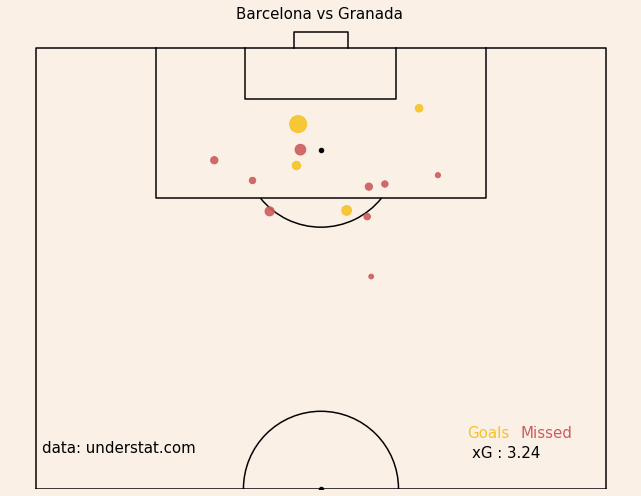

In [66]:
df1 = df_h.copy()
df1['y_conv'] = [68 - i for i in df1['y_conv']]

h_shot_goal = df1[df1['result'].isin(condition_1)]
h_shot_other = df1[df1['result'].isin(condition_2)]

hs_goal = h_shot_goal[['x_conv', 'y_conv']].values
hs_other = h_shot_other[['x_conv', 'y_conv']].values

background = "linen"

fig, ax = plt.subplots(figsize=(11, 7))
fig.set_facecolor(background)

draw_pitch(orientation="vertical",
           aspect="half",
           pitch_color=background,
           line_color="black",
           ax=ax)
ax.text(0.8, 0.1, 'Goals',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='#f6c324', fontsize=15)

ax.text(0.9, 0.1, 'Missed',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='indianred', fontsize=15)

ax.text(0.85, 0.06, 'xG : 3.24',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=15)

ax.text(0.63, 1, 'Barcelona vs Granada',
        verticalalignment='top', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=15)

ax.text(0.3, 0.1, 'data: understat.com',
        verticalalignment='top', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=15)

plt.tight_layout()

plt.scatter(hs_goal[:,1], hs_goal[:,0], color = '#f6c324', s = z1, alpha=.9, zorder = zz)
plt.scatter(hs_other[:,1], hs_other[:,0], color = 'indianred', s = z2, alpha=.9, zorder = zz)
plt.show()
